In [189]:
from sklearn.cluster import AgglomerativeClustering
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from scipy.cluster.hierarchy import fcluster, linkage
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import calinski_harabasz_score

In [190]:
small_data = pd.read_csv("Data/BAL/TestBALData.tsv", sep = '\t', usecols=range(2,6)).T
total_data = pd.read_csv("Data/BAL/normdataBAL0715.txt", sep = '\t').T
BAL_filtered = pd.read_csv("filtered_data_BAL.csv", sep = ',').T
sample_data = (datasets.load_iris()).data #default data set from sklearn for testing
BEC_filtered = pd.read_csv("filtered_bec.csv", sep = ',').T

dataBAL = BAL_filtered
dataBEC = BEC_filtered
clusterNum = 4

# SciKit Implementation:

In [191]:
def SKheirarichalClustering(data, clusterNum):
    clusters = AgglomerativeClustering(n_clusters=clusterNum, linkage='average')
    clusterLabels = clusters.fit(data).labels_
    return clusters, clusterLabels

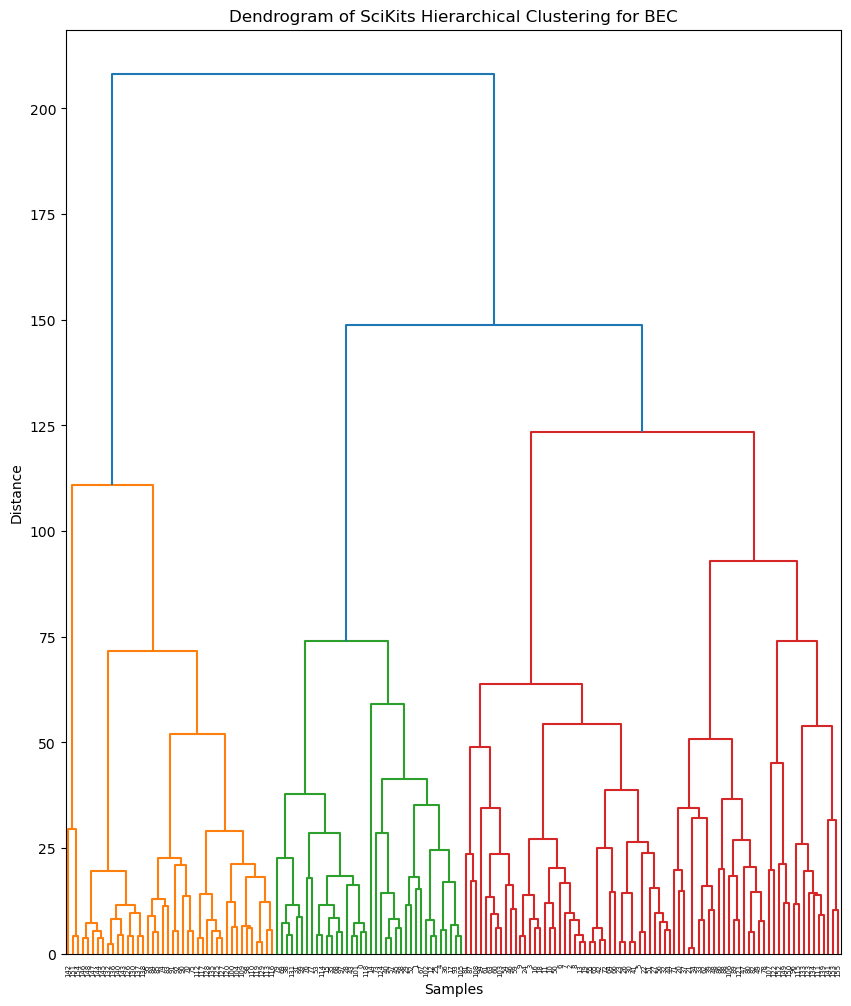

In [192]:
SKclusters, SKclusterLabels = SKheirarichalClustering(dataBEC, clusterNum)
SKclusterdict = {"0":[], "1":[], "2":[], "3":[]}
for i in range(len(SKclusterLabels)):
    label = str(SKclusterLabels[i])
    SKclusterdict[label].append(i)
SKclusters.fit(dataBEC)
Z = linkage(SKclusters.children_, method='average')
plt.figure(figsize=(10, 12))
dendrogram(Z)
plt.title('Dendrogram of SciKits Hierarchical Clustering for BEC')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

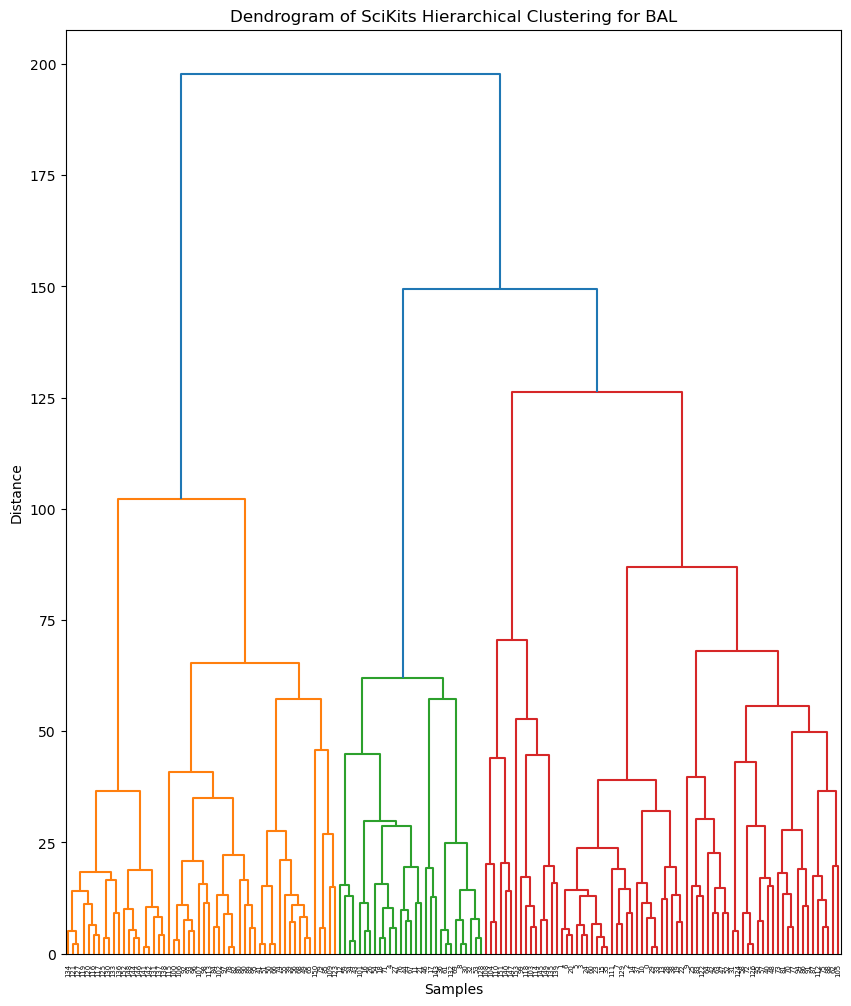

In [193]:
SKclusters, SKclusterLabels = SKheirarichalClustering(dataBAL, clusterNum)
SKclusterdict = {"0":[], "1":[], "2":[], "3":[]}
for i in range(len(SKclusterLabels)):
    label = str(SKclusterLabels[i])
    SKclusterdict[label].append(i)
SKclusters.fit(dataBAL)
Z = linkage(SKclusters.children_, method='average')
plt.figure(figsize=(10, 12))
dendrogram(Z)
plt.title('Dendrogram of SciKits Hierarchical Clustering for BAL')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Our Implementation:

In [194]:
def euclideanDistance(x, y):
    return np.sqrt(np.sum(np.power(x - y, 2)))

def distanceMatrix (data):
    n = data.shape[0]
    distMatrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1, n):
            distMatrix[i,j] = euclideanDistance(data[i], data[j])
            distMatrix[j,i] = distMatrix[i,j]
    return distMatrix

def heirarichalClustering (data, clusterNum):
    # Number of samples
    n = data.shape[0]
    # Creates distance matrix
    dist_matrix = distanceMatrix(data)
    # Places each data point into it's own cluster
    clusters = [[i] for i in range(n)]
    # Repeats until you have reduced from #sample clusters to #specified clusters
    while len(clusters) > clusterNum:
        # Finds closest clusters
        min = np.inf
        for i in range(len(clusters)):
            for j in range(i+1, len(clusters)):
                dist = np.mean([dist_matrix[a,b] for a in clusters[i] for b in clusters[j]])
                if dist < min:
                    min = dist
                    merged = (i, j)

        # Merge the two closest clusters
        clusters[merged[0]] += clusters[merged[1]]
        del clusters[merged[1]]
    return clusters

# Format of the output: index of cluster being merged - index of cluster being merged - distance between the two clusters - size of new merged cluster
def singleLinkage(data):
    distMatrix = distanceMatrix(data)
    numSamples = distMatrix.shape[0]
    Z = np.zeros((numSamples-1, 4))
    clusters = [[i] for i in range(numSamples)]

    for samples in range(numSamples-1):
        # Finds closest clusters
        min = 1000000
        for i in range(len(clusters)):
            for j in range(i+1, len(clusters)):
                dist = np.mean([distMatrix[a,b] for a in clusters[i] for b in clusters[j]])
                if dist < min:
                    min = dist
                    merged = (i, j)
        # Merge the two closest clusters
        Z[samples][0] = merged[0] 
        Z[samples][1] = merged[1]
        Z[samples][2] = min
        Z[samples][3] = len(clusters[merged[0]]) + 1
        clusters[merged[0]] += clusters[merged[1]]
        del clusters[merged[1]]
        samples += 1
    return Z

/var/folders/48/58h9_x896ts52nyqt295ln440000gn/T/ipykernel_72198/2493901337.py:15: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distMatrix, method='average')


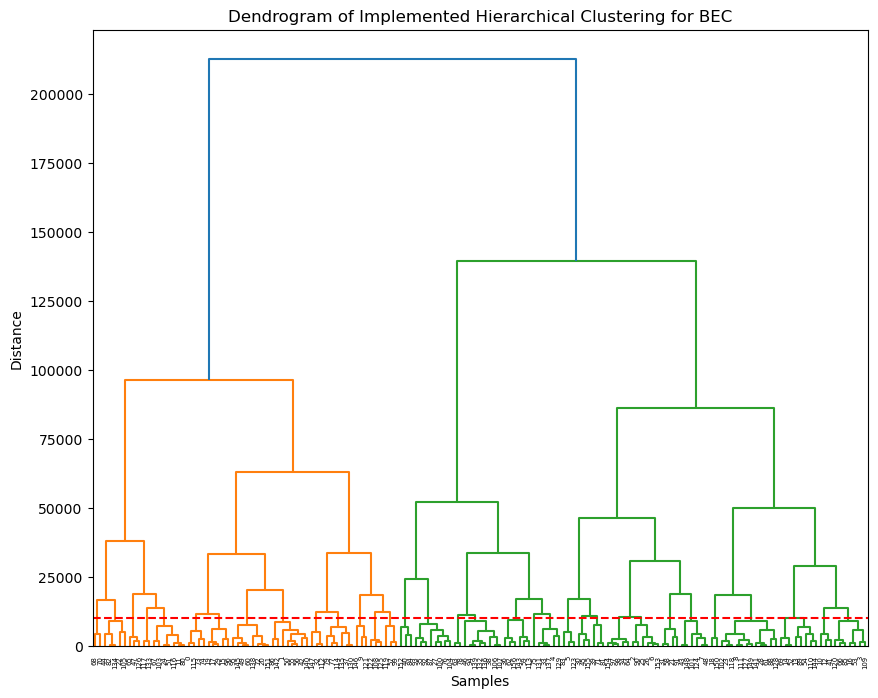

In [195]:
clusters = heirarichalClustering(dataBEC, clusterNum)
clusterDict = {"0":[], "1":[], "2":[], "3":[]}
for i in range(len(clusters)):
    label = str(i)
    clusterDict[label] = clusters[i]
clusterLabelList = []
for i in range(len(dataBEC)):
    for j in clusterDict: 
        for k in clusterDict[j]: #-->154
            if k == i:
                clusterLabelList.append(int(j))
distMatrix = distanceMatrix(dataBEC)
linkZ = singleLinkage(dataBEC)
Z = list(set(tuple(sorted(sub)) for sub in linkZ))
Z = linkage(distMatrix, method='average')
plt.figure(figsize=(10, 8))
dendrogram(Z)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Dendrogram of Implemented Hierarchical Clustering for BEC')
plt.axhline(y=10000, color='r', linestyle='--')
plt.show()
# orange - cluster 3/2, green - cluster 0, red - cluster 1, 
# notSA = 71, SA = 42, VSA = 2, NC = 38

In [196]:
ch_score = calinski_harabasz_score(dataBEC, clusterLabelList)
print("CH Score for BEC Data: ", ch_score)

CH Score for BEC Data:  0.881946446702621


/var/folders/48/58h9_x896ts52nyqt295ln440000gn/T/ipykernel_72198/1210167693.py:15: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distMatrix, method='average')


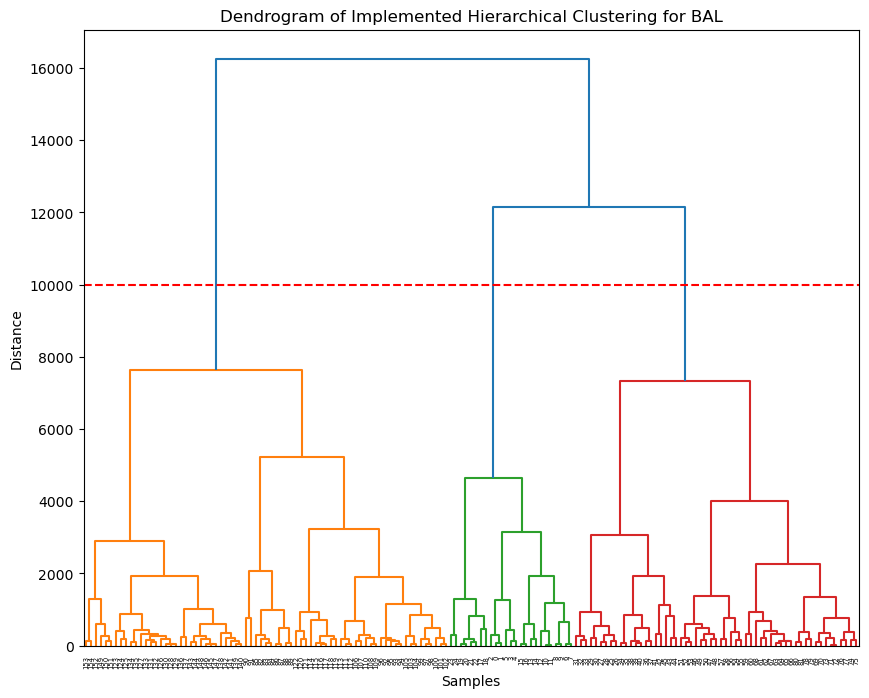

In [197]:
clusters = heirarichalClustering(dataBAL, clusterNum)
clusterDict = {"0":[], "1":[], "2":[], "3":[]}
for i in range(len(clusters)):
    label = str(i)
    clusterDict[label] = clusters[i]
clusterLabelList = []
for i in range(len(dataBAL)):
    for j in clusterDict: 
        for k in clusterDict[j]: #-->154
            if k == i:
                clusterLabelList.append(int(j))
distMatrix = distanceMatrix(dataBAL)
linkZ = singleLinkage(dataBAL)
Z = list(set(tuple(sorted(sub)) for sub in linkZ))
Z = linkage(distMatrix, method='average')
plt.figure(figsize=(10, 8))
dendrogram(Z)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Dendrogram of Implemented Hierarchical Clustering for BAL')
plt.axhline(y=10000, color='r', linestyle='--')
plt.show()

In [198]:
ch_score = calinski_harabasz_score(dataBAL, clusterLabelList)
print("CH Score for BAL Data: ", ch_score)

CH Score for BAL Data:  1.7590961259564943
